In [1]:
# import required packages
# utility
import numpy as np

# tensorflow
import tensorflow as tf

# plots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## EDA:

In [2]:
# generate the data
N = 1000

# uniformly distributed between (-3, +3)
X = np.random.random((N, 2)) * 6 - 3

# y = cos(2*x_1) + cos(3*x_2)
y = np.cos(2*X[:,0]) + np.cos(3*X[:, 1])

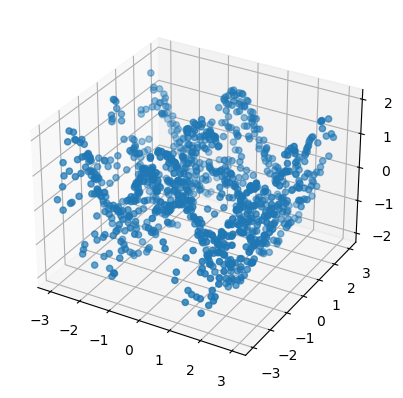

In [3]:
# plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y);

## Simple ANN Model for Regression:

In [4]:
# define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [5]:
# compile the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.01),
    loss='mse'
)

In [6]:
# train the model
r = model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9744
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9232
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9045
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9503
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8919
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8569
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8068
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7166
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6638
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5817
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5691
Epoch 13/100
32/32 [=================

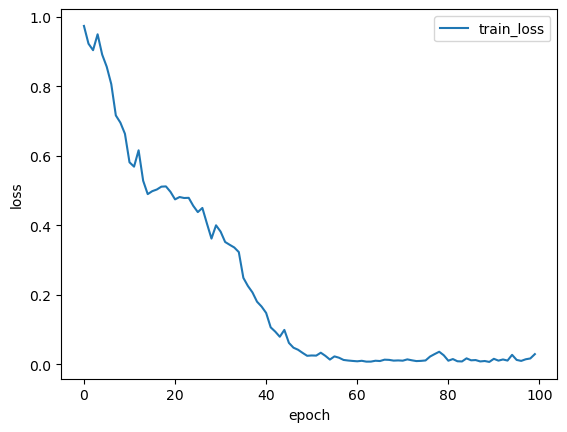

In [7]:
# plot the loss per epoch
plt.plot(r.history['loss'], label='train_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

79/79 [==============================] - 0s 1ms/step


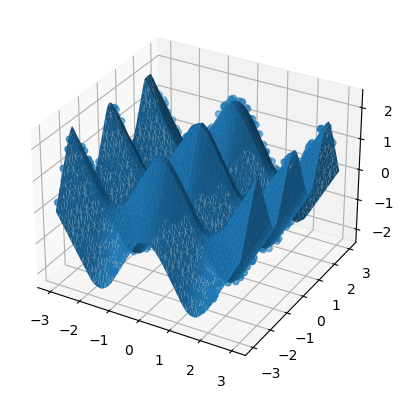

In [8]:
# plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], y_hat, linewidth=0.2, antialiased=True)
plt.show();

79/79 [==============================] - 0s 1ms/step


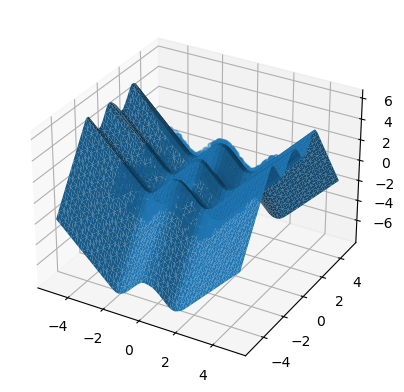

In [9]:
# plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], y_hat, linewidth=0.2, antialiased=True)
plt.show();